<a href="https://colab.research.google.com/github/singh-prishita/MLFinalAssignment/blob/main/Data_Cleaning_Listings_AirbnbDublin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

import datetime
import re

from itertools import chain

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading data
df_listings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/listings.csv')

In [4]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
df_listings[df_listings.id == 28827610]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [6]:
print(f'Number of the instances: {df_listings.shape[0]}')
print(f'Number of the attributes: {df_listings.shape[1]}')

Number of the instances: 7566
Number of the attributes: 75


In [7]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7566 non-null   int64  
 1   listing_url                                   7566 non-null   object 
 2   scrape_id                                     7566 non-null   int64  
 3   last_scraped                                  7566 non-null   object 
 4   source                                        7566 non-null   object 
 5   name                                          7566 non-null   object 
 6   description                                   7411 non-null   object 
 7   neighborhood_overview                         4194 non-null   object 
 8   picture_url                                   7566 non-null   object 
 9   host_id                                       7566 non-null   i

In [8]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.566000e+03,7.566000e+03,7.566000e+03,7566.000000,7566.000000,0.0,7566.000000,7566.000000,7566.000000,0.0,...,6081.000000,6085.000000,6081.000000,6079.000000,0.0,7566.000000,7566.000000,7566.000000,7566.000000,6209.000000
mean,1.265543e+17,2.022091e+13,1.165346e+08,24.575601,39.837959,NaN,53.345530,-6.254830,3.006080,NaN,...,4.828653,4.843747,4.732065,4.614547,NaN,4.160983,2.362543,1.576394,0.183584,1.319006
std,2.581749e+17,0.000000e+00,1.257774e+08,202.623363,340.458134,NaN,0.049009,0.063257,1.888488,NaN,...,0.363138,0.341995,0.352586,0.441799,NaN,9.654986,7.650292,6.266196,1.507330,1.988691
min,4.407700e+04,2.022091e+13,4.398400e+04,1.000000,1.000000,NaN,53.181730,-6.526020,1.000000,NaN,...,0.000000,0.000000,1.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.742072e+07,2.022091e+13,2.500539e+07,1.000000,1.000000,NaN,53.329160,-6.278058,2.000000,NaN,...,4.810000,4.820000,4.630000,4.500000,NaN,1.000000,0.000000,0.000000,0.000000,0.130000
50%,2.798028e+07,2.022091e+13,6.773535e+07,1.000000,2.000000,NaN,53.344210,-6.259630,2.000000,NaN,...,4.950000,4.970000,4.820000,4.710000,NaN,1.000000,1.000000,1.000000,0.000000,0.610000
75%,5.034204e+07,2.022091e+13,1.624988e+08,3.000000,4.000000,NaN,53.357332,-6.233332,4.000000,NaN,...,5.000000,5.000000,5.000000,4.890000,NaN,3.000000,1.000000,1.000000,0.000000,1.760000
max,7.130342e+17,2.022091e+13,4.787894e+08,2157.000000,12017.000000,NaN,53.635000,-6.052910,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,66.000000,55.000000,66.000000,20.000000,44.720000


In [9]:
print(f'This dataset contains {df_listings.host_id.nunique()} unique host ID')

This dataset contains 5436 unique host ID


In [10]:
# Calculating the Mean, standard deviation, minimum, maximum of listings per host

df_listings.groupby('host_id').id.count().agg([np.mean,np.std,np.min,np.max])

mean     1.391832
std      1.963391
amin     1.000000
amax    66.000000
Name: id, dtype: float64

In [11]:
# Check how data types are distributed. We have to check if each data type makes sense

df_listings.dtypes.value_counts()

object     34
int64      23
float64    18
dtype: int64

In [12]:
df_listings.select_dtypes(include=['object']).columns

Index(['listing_url', 'last_scraped', 'source', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'price', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'instant_bookable'],
      dtype='object')

In [13]:
df_listings.select_dtypes(include=['object']).head()

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,https://www.airbnb.com/rooms/44077,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,...,Private room in bungalow,Private room,1.5 shared baths,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",$70.00,t,2022-09-12,2011-03-20,2022-09-09,f
1,https://www.airbnb.com/rooms/85156,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,https://www.airbnb.com/users/show/193005,Teresa,2010-08-06,...,Private room in bungalow,Private room,1.5 shared baths,"[""Oven"", ""Fire extinguisher"", ""Dryer"", ""Hanger...",$67.00,t,2022-09-12,2011-05-24,2022-09-11,f
2,https://www.airbnb.com/rooms/159889,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,https://www.airbnb.com/users/show/766611,Margaret,2011-07-01,...,Private room in home,Private room,2 shared baths,"[""Oven"", ""Fire extinguisher"", ""Hangers"", ""Carb...",$45.00,t,2022-09-12,2012-03-20,2022-09-01,f
3,https://www.airbnb.com/rooms/162809,2022-09-11,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,https://www.airbnb.com/users/show/777681,Robbie,2011-07-04,...,Private room in townhouse,Private room,1.5 shared baths,"[""Oven"", ""Hot water kettle"", ""Fire extinguishe...",$80.00,t,2022-09-11,2015-06-01,2022-08-31,f
4,https://www.airbnb.com/rooms/165828,2022-09-11,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,https://www.airbnb.com/users/show/790601,Grainne,2011-07-07,...,Entire rental unit,Entire home/apt,1 bath,"[""Fire extinguisher"", ""Dryer"", ""Hangers"", ""Ind...",$251.00,t,2022-09-11,2011-10-25,2022-06-28,t


In [14]:
# Dropping the irrelevant objects types that are not useful for the analysis, without losing much of information.

drop_obj_cols = [
                 'listing_url','last_scraped',
                 'name', 'description',
                 'picture_url','host_url',
                 'neighborhood_overview',
                 'host_name','host_since',
                 'host_location','host_about',
                 'host_thumbnail_url','host_picture_url',
                 'host_neighbourhood','calendar_last_scraped',
                 'neighbourhood', 'has_availability',
                 'calendar_last_scraped', 'license',
                 'host_verifications','property_type'
                ]

In [15]:
df_listings.select_dtypes(include=['float64']).columns

Index(['neighbourhood_group_cleansed', 'latitude', 'longitude', 'bathrooms',
       'bedrooms', 'beds', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'calendar_updated', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'reviews_per_month'],
      dtype='object')

In [16]:
df_listings.select_dtypes(include=['float64']).head()

,neighbourhood_group_cleansed,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,NaN,53.29178,-6.25792,NaN,1.0,2.0,3.0,1125.0,NaN,4.78,4.83,4.74,4.93,4.93,4.66,4.82,NaN,1.85
1,NaN,53.29209,-6.25624,NaN,1.0,1.0,3.0,21.0,NaN,4.79,4.86,4.74,4.90,4.88,4.64,4.78,NaN,1.53
2,NaN,53.39027,-6.23547,NaN,1.0,1.0,2.0,21.0,NaN,4.74,4.77,4.71,4.86,4.90,4.63,4.74,NaN,2.78
3,NaN,53.28326,-6.19188,NaN,2.0,4.0,1.0,12.0,NaN,4.84,4.88,4.85,4.95,4.97,4.77,4.85,NaN,3.68
4,NaN,53.33744,-6.32363,NaN,1.0,3.0,3.0,365.0,NaN,4.63,4.89,4.69,4.81,4.75,4.34,4.55,NaN,0.48


In [21]:
drop_float_cols = [
                   'neighbourhood_group_cleansed',
                   'bathrooms','calendar_updated',
                   'minimum_nights_avg_ntm',
                   'maximum_nights_avg_ntm'
                   ]

In [17]:
df_listings.select_dtypes(include=['int64']).columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [18]:
df_listings.select_dtypes(include=['int64']).head()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,accommodates,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,44077,20220911231053,193005,2,2,2,3,1125,3,3,...,11,18,104,258,31,7,2,0,2,0
1,85156,20220911231053,193005,2,2,2,3,21,3,3,...,9,21,110,210,28,4,2,0,2,0
2,159889,20220911231053,766611,3,4,1,2,21,1,2,...,16,36,290,355,44,6,3,0,3,0
3,162809,20220911231053,777681,2,2,6,1,12,1,1,...,2,2,74,326,41,1,2,0,2,0
4,165828,20220911231053,790601,5,5,5,3,365,3,3,...,4,21,31,64,17,0,5,5,0,0


In [19]:
drop_int_cols = [
                 'scrape_id','host_id',
                 'minimum_minimum_nights','maximum_minimum_nights',
                 'minimum_maximum_nights','maximum_maximum_nights',
                 'availability_30', 'availability_60', 
                 'availability_365','availability_90',
                 'calculated_host_listings_count',
                 'calculated_host_listings_count_entire_homes',
                 'calculated_host_listings_count_private_rooms',
                 'calculated_host_listings_count_shared_rooms'
                ]

In [22]:
drop_cols = drop_obj_cols + drop_float_cols + drop_int_cols

print(f"Shape of dataset before dropping: {df_listings.shape}")
print(f"Dropping off {len(drop_cols)} columns")
df_cols_clean = df_listings.drop(columns=drop_cols)
print(f"Shape of the dataset after dropping: {df_cols_clean.shape}")

Shape of dataset before dropping: (7566, 75)
Dropping off 40 columns
Shape of the dataset after dropping: (7566, 36)


In [23]:
# Check for missing values
cols_missings_perc = df_cols_clean.isnull().sum() / len(df_cols_clean)
cols_missings = cols_missings_perc[cols_missings_perc >0]

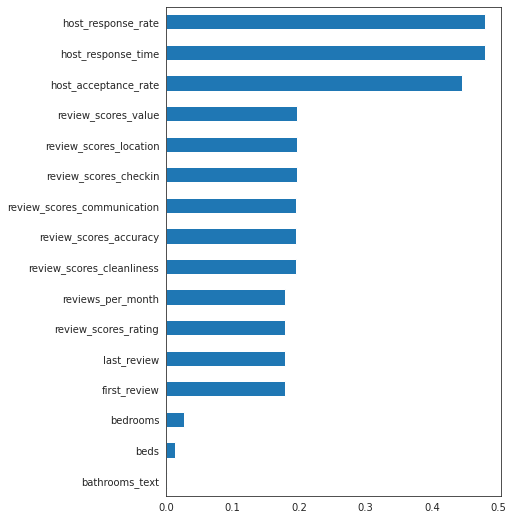

In [24]:
cols_missings.sort_values(ascending=True).plot(kind='barh', figsize=(6,9))

In [25]:
df_cols_clean['host_acceptance_rate'] = df_cols_clean['host_acceptance_rate'].str.rstrip("%")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


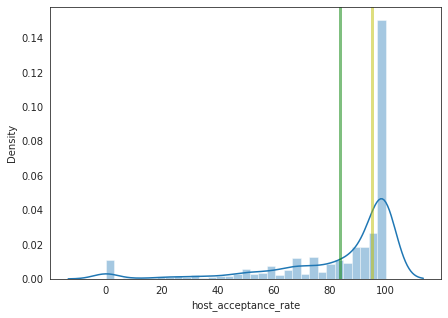

In [26]:
f, ax = plt.subplots(figsize=(7, 5))

df_cols_clean['host_acceptance_rate'] = pd.to_numeric(df_cols_clean.host_acceptance_rate)
ax = sns.distplot(df_cols_clean['host_acceptance_rate'])

plt.axvline(x=df_cols_clean.host_acceptance_rate.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=df_cols_clean.host_acceptance_rate.median(), linewidth=3, color='y', label="median", alpha=0.5)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


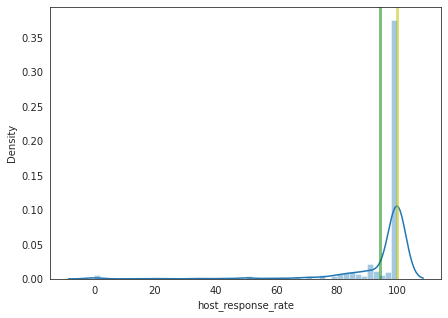

In [27]:
df_cols_clean['host_response_rate'] = df_cols_clean['host_response_rate'].str.rstrip("%")

f, ax = plt.subplots(figsize=(7, 5))

df_cols_clean['host_response_rate'] = pd.to_numeric(df_cols_clean.host_response_rate)
ax = sns.distplot(df_cols_clean.host_response_rate)

plt.axvline(x=df_cols_clean.host_response_rate.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=df_cols_clean.host_response_rate.median(), linewidth=3, color='y', label="median", alpha=0.5)


In [28]:
df_cols_clean.drop(df_cols_clean[df_cols_clean.accommodates == 0].index, inplace = True)
df_cols_clean.drop(df_cols_clean[df_cols_clean.beds == 0].index, inplace = True)
df_cols_clean.drop(df_cols_clean[df_cols_clean.beds.isnull() == True].index, inplace = True)
df_cols_clean.drop(df_cols_clean[df_cols_clean.bathrooms_text.isnull() == True].index, inplace = True)

In [29]:
# Fill the missing values for host_acceptance_rate with the median since the distribution is left skewed
df_cols_clean['host_acceptance_rate'].fillna(df_cols_clean['host_acceptance_rate'].median(), inplace = True)

# Fill the missing values for host_acceptance_rate with the median since the distribution is left skewed
df_cols_clean['host_response_rate'].fillna(df_cols_clean['host_response_rate'].median(), inplace = True)

# Fill the missing values for host_response_time (categorical) with NA
df_cols_clean['host_response_time'].fillna('NA', inplace = True)

In [30]:
# Fill the missing values for review_score_* with the mean by accommodates (# of people that can be hosted)

df_cols_clean['review_scores_rating'].fillna(df_cols_clean.groupby('accommodates')['review_scores_rating'].transform('mean'), inplace = True)
df_cols_clean['review_scores_accuracy'].fillna(df_cols_clean.groupby('accommodates')['review_scores_accuracy'].transform('mean'), inplace = True)
df_cols_clean['review_scores_cleanliness'].fillna(df_cols_clean.groupby('accommodates')['review_scores_cleanliness'].transform('mean'), inplace = True)
df_cols_clean['review_scores_checkin'].fillna(df_cols_clean.groupby('accommodates')['review_scores_checkin'].transform('mean'), inplace = True)
df_cols_clean['review_scores_communication'].fillna(df_cols_clean.groupby('accommodates')['review_scores_communication'].transform('mean'), inplace = True)
df_cols_clean['review_scores_location'].fillna(df_cols_clean.groupby('accommodates')['review_scores_location'].transform('mean'), inplace = True)
df_cols_clean['review_scores_value'].fillna(df_cols_clean.groupby('accommodates')['review_scores_value'].transform('mean'), inplace = True)


In [31]:
# Fill missing values for reviews_per_month, first_review, last_review with 0, since it seems these records don't have any review.

df_cols_clean['reviews_per_month'].fillna(0, inplace = True)

In [32]:
df_cols_clean['first_review'] = pd.to_datetime(df_cols_clean['first_review'], infer_datetime_format=True)


In [33]:
df_cols_clean['last_review'] = pd.to_datetime(df_cols_clean['last_review'], infer_datetime_format=True)

In [34]:
# Fill missing values for host_identity_verified with NA
df_cols_clean.host_identity_verified.fillna('NA', inplace = True)

# Fill missing values for host_has_profile_pic with NA
df_cols_clean.host_has_profile_pic.fillna('NA', inplace = True)

# Fill missing values for host_total_listing_count with the median
df_cols_clean.host_total_listings_count.fillna(df_cols_clean.host_total_listings_count.median(), inplace = True)

# Fill missing values for host_listing_count with the median
df_cols_clean.host_listings_count.fillna(df_cols_clean.host_listings_count.median(), inplace = True)

# Fill missing values for host_is_superhost with the NA
df_cols_clean.host_is_superhost.fillna('NA', inplace = True)

In [35]:
# Fill the missing values for bedrooms with 1, since most of them are studio, suite or loft
df_cols_clean['bedrooms'].fillna(1, inplace = True)

In [36]:
df_cols_clean['bathrooms'] = df_cols_clean.bathrooms_text.str.extract(r'([+-]?([0-9]*[.])?[0-9]+)', expand = False).astype(float)[0]
df_cols_clean['bathrooms'].fillna(1, inplace = True)

In [38]:
# Create a new column with 1 if the bathroom is shared and 0 otherwise.
word_list = ['shared']
df_cols_clean['bathroom_shared'] = df_listings.bathrooms_text.str.extract(r'({})'.format('|'.join(word_list)), expand=False).str.lower().fillna('')
df_cols_clean['bathroom_shared'] = [1 if x == 'shared' else 0 for x in df_cols_clean['bathroom_shared']]

df_cols_clean = df_cols_clean.drop(columns=['bathrooms_text'])

In [39]:
# Convert price column to numeric
df_cols_clean['price'] = [float(str(i).replace('$','').replace(',', '')) for i in df_cols_clean['price']]

In [40]:
# Convert first_review and last_review to datetime and create numeric columns
df_cols_clean[['first_review','last_review']] = df_cols_clean[['first_review','last_review']].apply(pd.to_datetime)
df_cols_clean['days_since_first_review'] = (datetime.datetime.utcnow() - df_cols_clean['first_review']).dt.days
df_cols_clean['days_since_last_review'] = (datetime.datetime.utcnow() - df_cols_clean['last_review']).dt.days

In [41]:
df_cols_clean = df_cols_clean.drop(columns=['first_review','last_review'])

In [42]:
# Lowecase amenities in lists
df_cols_clean['amenities'] = df_cols_clean['amenities'].str.lower()

In [43]:
# Replace the words pool table and whirpool to not confuse them with the pool when selecting the amenities
df_cols_clean['amenities'] = df_cols_clean['amenities'].str.replace('pool table','biliard')
df_cols_clean['amenities'] = df_cols_clean['amenities'].str.replace('whirpool','')

In [44]:
# Get an idea of what type of amenities are in the list to make a selection
amenities_list = []
for i in df_cols_clean['amenities']:
    items_lower = i.lower().replace('"', "")
    tokens = items_lower.split(',')
    amenities_list.append(tokens)

ameneties_list_unique = list(set(chain(*amenities_list)))
#ameneties_list_unique

In [45]:
# Select the most important amenities for guests based on the industry experience
amenities_searchfor = {
    'coffee_machine': ['coffee','espresso','nespresso'],
    'wifi': ['wifi'],
    'fireplace': ['fireplace','fire pit'],
    'microwave': ['microwave','microonde oven'],
    'parking': ['parking','garage'],
    'bathroom_essentials': ['shampoo','soap','shower gel','body soap'],
    'pool': ['pool'],
    'terrace_patio_balcony': ['terrace','patio','balcony'],
    'bathtub': ['bathtub'],
    'sauna': ['sauna'],
    'bikes': ['bikes'],
    'iron': ['iron','ironing board'],
    'garden_backyard': ['garden','backyard'],
    'workspace': ['desk','workspace'],
    'tv': ['tv'],
    'air_conditioning': ['air conditioning'],
    'pets_allowed': ['pets allowed'],
    'bbq_grill': ['bbq'],
    'crib': ['crib'],
    'gym': ['gym'],
    'bed_linens': ['bed linens'],
    'hair_dryer': ['hair dryer'],
    'luggage_dropoff_allowed': ['luggage dropoff allowed'],
    'self_checkin': ['self check-in'],
    'cooking_basics': ['cooking basics','dishes','silverware'],
    'refrigerator': ['refrigerator', 'mini fridge']
            }

for key, value in amenities_searchfor.items():
    df_cols_clean[key] = df_cols_clean['amenities'].str.contains("|".join(list(value)), case=False, na=False).astype(int)

df_cols_clean[amenities_searchfor.keys()].head()

,coffee_machine,wifi,fireplace,microwave,parking,bathroom_essentials,pool,terrace_patio_balcony,bathtub,sauna,...,pets_allowed,bbq_grill,crib,gym,bed_linens,hair_dryer,luggage_dropoff_allowed,self_checkin,cooking_basics,refrigerator
0,1,1,1,1,1,1,0,1,1,0,...,0,0,0,0,1,1,0,0,1,1
1,1,1,1,1,1,1,0,1,0,0,...,0,0,0,0,1,1,1,0,1,1
2,0,1,0,1,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,1,0,1,1,1,0,0,0,0,...,0,0,1,1,1,1,1,0,1,1
4,1,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,1


In [46]:
# Drop column amenities
df_cols_clean = df_cols_clean.drop(columns=['amenities'])

In [47]:
categorical_col = df_cols_clean.select_dtypes('object').columns.tolist()
for c in categorical_col:
    print(round(df_cols_clean[c].value_counts(normalize=True)*100,2))
    print("====================================")
    print(" ")

previous scrape    55.22
city scrape        44.78
Name: source, dtype: float64
 
NA                    48.18
within an hour        34.60
within a few hours     9.91
within a day           6.13
a few days or more     1.18
Name: host_response_time, dtype: float64
 
f    87.1
t    12.9
Name: host_is_superhost, dtype: float64
 
t    98.38
f     1.62
Name: host_has_profile_pic, dtype: float64
 
t    74.36
f    25.64
Name: host_identity_verified, dtype: float64
 
Dublin City              73.65
Dn Laoghaire-Rathdown    12.00
Fingal                    9.92
South Dublin              4.43
Name: neighbourhood_cleansed, dtype: float64
 
Entire home/apt    50.32
Private room       46.88
Shared room         2.28
Hotel room          0.52
Name: room_type, dtype: float64
 
f    63.32
t    36.68
Name: instant_bookable, dtype: float64
 


In [48]:
# Convert feature instant_bookable to 1 for true and 0 for false
# Dealing with binary variables

def encode_binary_variables(data,col):
    data[col] = data[col].replace({'t':1, 'f':0})
    return data

df_cols_clean = encode_binary_variables(df_cols_clean,'instant_bookable')

df_cols_clean['instant_bookable'].value_counts(normalize=True)

0    0.633235
1    0.366765
Name: instant_bookable, dtype: float64

In [49]:
numerical_col = df_cols_clean.select_dtypes(['int64','float64']).columns.tolist()
for n in numerical_col:
    print(round(df_cols_clean[n].value_counts(normalize=True)*100,2))
    print("====================================")
    print(" ")

44077                 0.01
40301526              0.01
40439840              0.01
40394483              0.01
40373285              0.01
                      ... 
20328651              0.01
20328174              0.01
20327406              0.01
20312395              0.01
713034176403340330    0.01
Name: id, Length: 7468, dtype: float64
 
100.0    84.63
90.0      1.75
99.0      1.37
98.0      1.14
85.0      1.00
86.0      0.71
80.0      0.67
92.0      0.64
93.0      0.62
96.0      0.60
82.0      0.60
0.0       0.54
75.0      0.52
50.0      0.51
97.0      0.46
91.0      0.42
70.0      0.39
95.0      0.36
79.0      0.33
83.0      0.32
89.0      0.28
94.0      0.28
67.0      0.25
33.0      0.19
60.0      0.19
88.0      0.19
20.0      0.15
40.0      0.08
84.0      0.08
43.0      0.08
73.0      0.07
87.0      0.05
57.0      0.05
78.0      0.05
63.0      0.05
71.0      0.05
58.0      0.04
64.0      0.04
10.0      0.03
74.0      0.03
55.0      0.03
25.0      0.03
14.0      0.03
47.0      0.01
81

In [51]:
# Remove outlier in Shared_room
delete_row = df_cols_clean[df_cols_clean.id == 28827610].index
df_cols_clean = df_cols_clean.drop(delete_row)

In [53]:
df_listings.price[(df_listings.room_type == 'Private room') & (df_listings.accommodates==7)]

3208    $129.00
4203    $719.00
6732    $450.00
Name: price, dtype: object

In [54]:
df_cols_clean['price_per_person'] = df_cols_clean.price / df_cols_clean.accommodates

In [55]:
df_cols_clean[['price','price_per_person']].describe()

,price,price_per_person
count,7468.000000,7468.000000
mean,183.061501,75.706190
std,1178.155497,1154.094514
min,10.000000,2.142857
25%,65.000000,30.000000
50%,105.000000,42.500000
75%,194.000000,63.500000
max,99149.000000,99149.000000


In [56]:
df_cols_clean.columns

Index(['id', 'source', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'bathrooms', 'bathroom_shared', 'days_since_first_review',
       'days_since_last_review', 'coffee_machine', 'wifi', 'fireplace',
       'microwave', 'parking', 'bathroom_essentials', 'pool',
       'terrace_patio_balcony', 'bathtub', 'sauna', 'bikes', 'iron',
     

In [57]:
df_cols_clean[['accommodates','price','price_per_person']].head()

,accommodates,price,price_per_person
0,2,70.0,35.000000
1,2,67.0,33.500000
2,1,45.0,45.000000
3,6,80.0,13.333333
4,5,251.0,50.200000


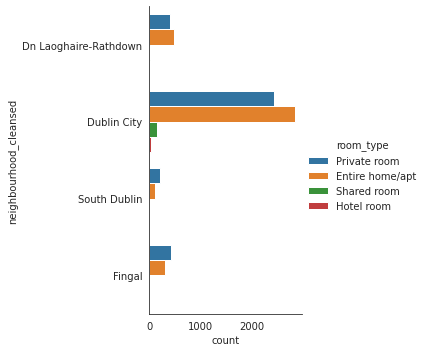

In [58]:
sns.catplot(data=df_cols_clean, y="neighbourhood_cleansed", hue = 'room_type', kind='count')

In [59]:
df_cols_clean['neighbourhood_cleansed'].value_counts()

Dublin City              5500
Dn Laoghaire-Rathdown     896
Fingal                    741
South Dublin              331
Name: neighbourhood_cleansed, dtype: int64

In [ ]:
df_cols_clean[df_cols_clean.duplicated() == True]

,id,source,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,bbq_grill,crib,gym,bed_linens,hair_dryer,luggage_dropoff_allowed,self_checkin,cooking_basics,refrigerator,price_per_person


In [ ]:
df_clean_listings = pd.get_dummies(df_cols_clean)

In [ ]:
df_clean_listings.columns

Index(['id', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'bathrooms', 'bathroom_shared', 'days_since_first_review',
       'days_since_last_review', 'coffee_machine', 'wifi', 'fireplace',
       'microwave', 'parking', 'bathroom_essentials', 'pool',
       'terrace_patio_balcony', 'bathtub', 'sauna', 'bikes', 'iron',
       'garden_backyard', 'workspace', 'tv', 'air_conditioning',
       'pets_allowed', 'bbq_grill', 'crib', 'gym', 'bed_linens', 'hair_dryer',
       'luggage_d

In [ ]:
df_clean_listings.to_pickle('/content/drive/MyDrive/Colab Notebooks/df_clean_listings.pkl')

In [ ]:
## Checking to make sure it pickled correctly:
df_clean_listings = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/df_clean_listings.pkl')
df_clean_listings.shape

(7468, 77)